# DDEGK visualization on EPI dataset

In [ ]:
import json
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
import networkx as nx
import scipy.spatial
import matplotlib.pyplot as plt
import itertools
from tqdm.notebook import tqdm
from math import ceil

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load data

In [ ]:
DIR = ''

In [ ]:
# load embeddings
with open(DIR + 'epi.json') as ff:
    data = list(map(json.loads, ff))
for i in range(len(data)):
    assert data[i]['idx'] == i

In [ ]:
# load event graphs
with open(DIR + 'epi_stratified_sample.json') as ff:
    graphs = [nx.node_link_graph(g) for g in json.load(ff)]
    roots = [g.graph['root'] for g in graphs]
    nodes_list = [list(g.nodes.data('type')) for g in graphs]
    et = [n[1] for i in range(len(graphs)) for n in nodes_list[i] if n[0]== roots[i]] 

In [ ]:
prototypes = sorted(data[0]['embedding'].keys())
for g in data:
    assert prototypes == sorted(g['embedding'].keys())

In [ ]:
embeddings = [None] * len(data)
for g in data:
    embeddings[g['idx']] = [g['embedding'][i] for i in prototypes]
assert all(x is not None for x in embeddings)

In [ ]:
emb16d_orig = np.array(embeddings)

# Non-normalized

In [ ]:
emb2d_orig = TSNE(random_state=42).fit_transform(emb16d_orig)

# Normalized

In [ ]:
emb16d_norm = normalize(emb16d_orig)

In [ ]:
emb2d_norm = TSNE(random_state=42).fit_transform(emb16d_norm)

In [ ]:
def plot_embeddings(emb, classes, labels=None):
    if labels is None:
        labels = np.unique(classes)
    scatter = plt.scatter(emb[:, 0], emb[:, 1], s=5, c=colors)
    legend_handles = [Line2D([0], [0], color=c, lw=4) for c in palette]
    legend = plt.legend(legend_handles,
                        labels,
                        loc='upper left',
                        bbox_to_anchor=(1.05, 1),
                        shadow=False,
                        ncol=ceil(len(labels) / 14))

In [ ]:
# labels event type
graph_labels_names = list(set(et))
graph_labels = [graph_labels_names.index(e) for e in et]

In [ ]:
# colors
palette = ['b','g','r', 'c', 'm', 'y', 'k', 'lime', 'salmon', 'orange']
colors = [palette[graph_labels_names.index(e)] for e in et]

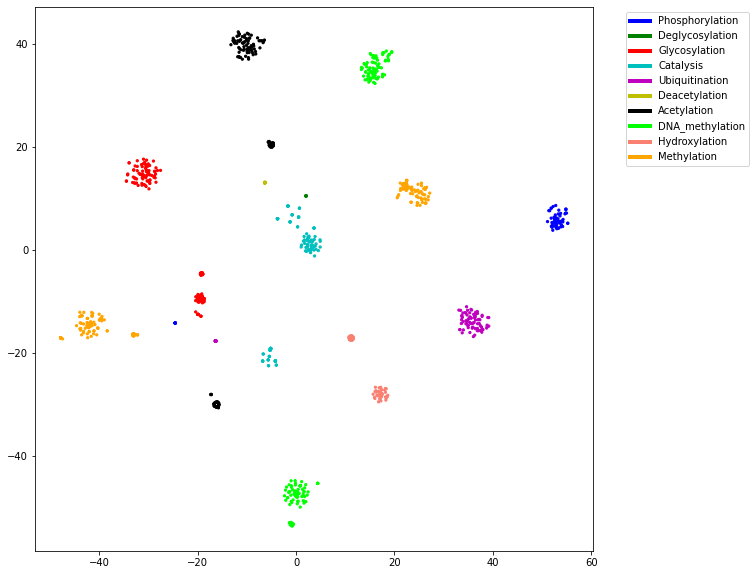

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(10,10))
plot_embeddings(emb2d_norm, graph_labels, graph_labels_names)